## **Plottable**

_Premier League 2023/24_

In [166]:
# imports
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

Scrape data from [Fbref](https://fbref.com/), plot data with `Plottable` in `.py`

In [167]:
# read data from fbref
pl = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats', attrs={'id': "results2023-202491_overall"})[0]

print(pl.shape)
print('')
print(pl.columns)
print('')
pl.head()

(20, 20)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,30,21,5,4,72,24,48,68,2.27,58.1,20.7,37.4,1.25,W W W D W,60216,Bukayo Saka - 13,David Raya,NaN
1,2,Liverpool,29,20,7,2,67,27,40,67,2.31,65.3,34.9,30.4,1.05,W W W D W,54888,Mohamed Salah - 16,Alisson,NaN
2,3,Manchester City,30,20,7,3,67,29,38,67,2.23,60.6,28.9,31.6,1.05,W W D D W,52971,Erling Haaland - 18,Ederson,NaN
3,4,Aston Villa,31,18,5,8,63,46,17,59,1.90,53.4,46.3,7.1,0.23,W L D W L,41939,Ollie Watkins - 16,Emiliano Martínez,NaN
4,5,Tottenham,30,17,6,7,62,44,18,57,1.90,53.2,48.5,4.7,0.16,W W L W D,61553,Son Heung-min - 15,Guglielmo Vicario,NaN


In [168]:
pl['Squad'] = pl['Squad'].replace('Manchester Utd', 'Manchester United')
pl['Squad'] = pl['Squad'].replace('Newcastle Utd', 'Newcastle United')
pl['Squad'] = pl['Squad'].replace('Nott\'ham Forest', 'Nottingham Forest')
pl['Squad'] = pl['Squad'].replace('Sheffield Utd', 'Sheffield United')
pl['Squad'] = pl['Squad'].replace('Tottenham', 'Tottenham Hotspur')
pl['Squad'] = pl['Squad'].replace('West Ham', 'West Ham United')
pl['Squad'] = pl['Squad'].replace('Wolves', 'Wolverhampton')

In [169]:
# read and insert Club's badges
pl['badge'] = pl['Squad'].apply(
    lambda x: f"../../logos/PremierLeague/{x.lower()}.png"
)

In [170]:
# data cleaning
pl[['xG', 'xGA', 'xGD', 'xGD/90']] = pl[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

pl = pl[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [171]:
# set up the colors

row_colors = {
    "top4": "#2d3636",
    "top6": "#273030",
    "relegation": "#313b3b",
    "even": "#627979",
    "odd": "#222222",
}

bg_color = row_colors["odd"]
text_color = "#bfa75d"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [172]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(pl["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(pl["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(pl["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

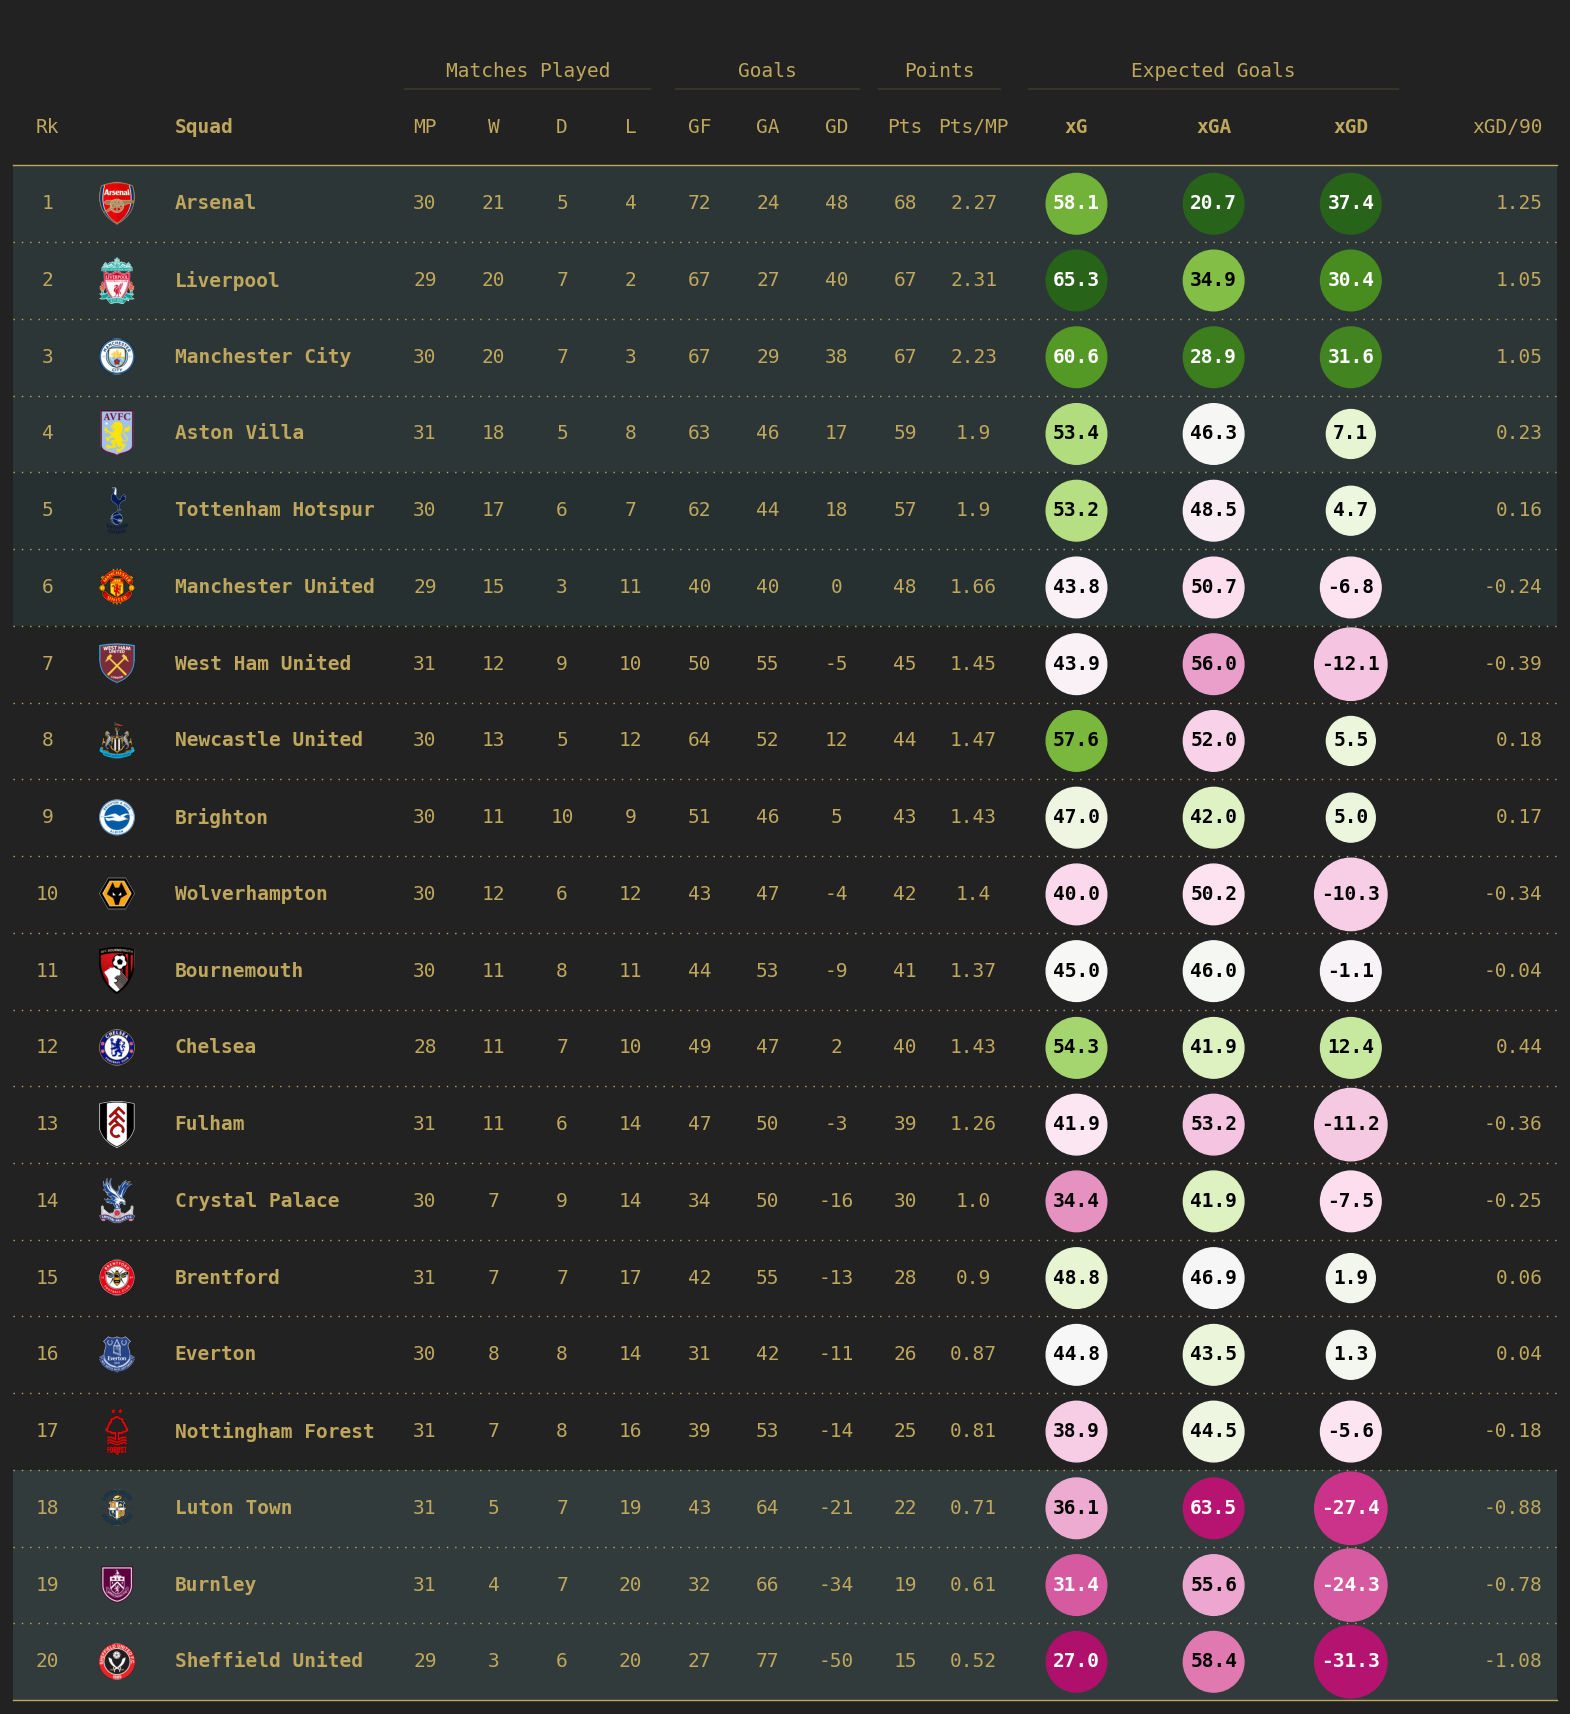

In [173]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    pl,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# Optional: add colors to the rows

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["top6"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])

In [174]:
# save figure
fig.savefig("../figures/pl_2324_MD30.png", facecolor=ax.get_facecolor(), dpi=200, bbox_inches="tight")

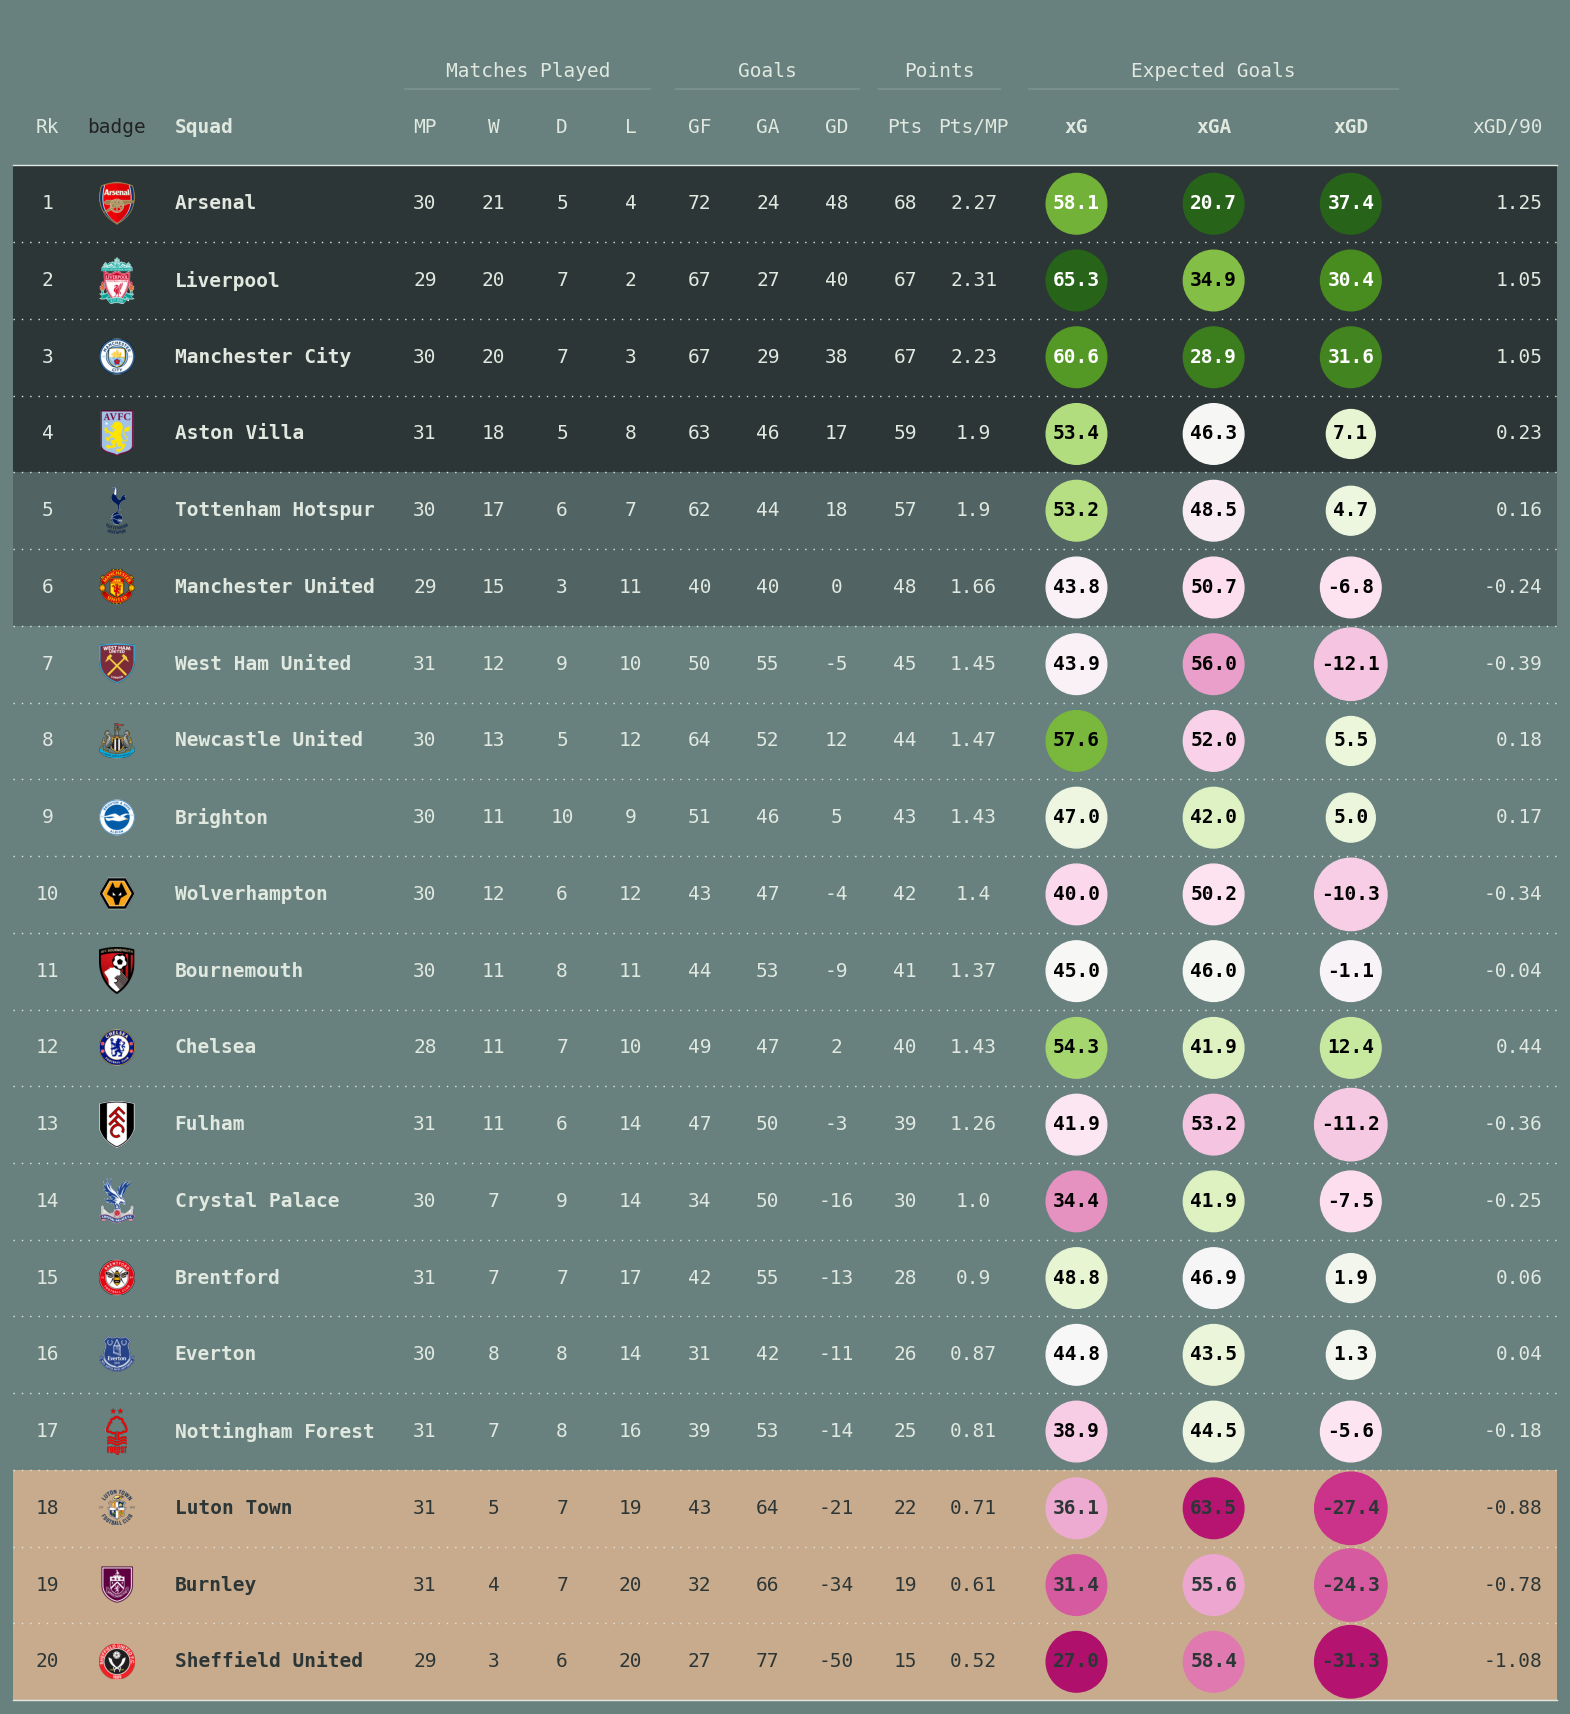

In [175]:
# set up the colors

row_colors = {
    "top4": "#2d3636",
    "top6": "#516362",
    "playoffs": "#8d9386",
    "relegation": "#c8ab8d",
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    pl,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# Optional: add colors to the rows

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["top6"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])
    table.rows[idx].set_fontcolor(row_colors["top4"])